Exercise
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

Answer
53713.86 and 93747.79

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

In [47]:
df = pd.read_csv('hiring.csv')
df.head()

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000

In [48]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [49]:
df.experience = df.experience.fillna('zero')
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000

In [50]:
med = df['test_score(out of 10)'].median()
med

8.0

In [51]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(med)
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    8.0                           7      72000
7     eleven                    7.0                           8      80000

In [52]:
df.isnull().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

### As the linear regression model only deal with numbers let's convert experience to num

In [53]:
df.experience = df.experience.apply(w2n.word_to_num)
df

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    8.0                           7      72000
7          11                    7.0                           8      80000

### Build Model

In [54]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [55]:
X_train = df.iloc[:,:-1]
X_train

experience  test_score(out of 10)  interview_score(out of 10)
0           0                    8.0                           9
1           0                    8.0                           6
2           5                    6.0                           7
3           2                   10.0                          10
4           7                    9.0                           6
5           3                    7.0                          10
6          10                    8.0                           7
7          11                    7.0                           8

In [56]:
y_train = df.iloc[:,-1]
y_train

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [57]:
reg.fit(X_train,y_train)

LinearRegression()

1. 2 yr experience, 9 test score, 6 interview score

2. 12 yr experience, 10 test score, 10 interview score

Answer: 53713.86 and 93747.79

In [58]:
reg.predict([[2,9,6]])

C:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [60]:
reg.predict([[12,10,10]])

C:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

C:\Users\mtayy\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='salary($)'>

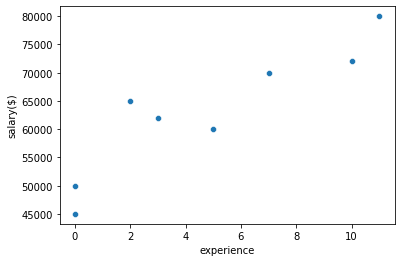

In [63]:
# Draw graph
sns.scatterplot(df.experience,y_train)

<AxesSubplot:xlabel='experience', ylabel='salary($)'>

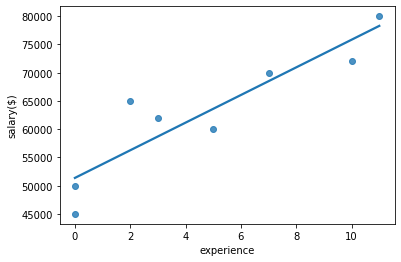

In [66]:
sns.regplot(df.experience,y_train,ci=None)